In [1]:
import os
import pandas as pd
import nltk
import matplotlib.pyplot as plt

In [11]:
tweet_count = 13000
text_query = "#vegan"
since_date = "2017-01-01"
until_date = "2021-01-01"

os.system('snscrape --jsonl --max-results {} --since {} twitter-search "{} until:{}"> text-query-tweets.json'.format(tweet_count, since_date, text_query, until_date))
tweets = pd.read_json('text-query-tweets.json', lines=True)

In [73]:
tweets.head(2)

_type  \
0  snscrape.modules.twitter.Tweet   
1  snscrape.modules.twitter.Tweet   

                                                 url  \
0  https://twitter.com/JFKFarms/status/1344679981...   
1  https://twitter.com/ayedewd/status/13443014515...   

                       date  \
0 2020-12-31 16:21:05+00:00   
1 2020-12-30 15:16:56+00:00   

                                             content  \
0  @tofar1 You’ve got to come up with a different...   
1  @pinchebrujeria Should’ve said plants are just...   

                                     renderedContent                   id  \
0  @tofar1 You’ve got to come up with a different...  1344679981935423489   
1  @pinchebrujeria Should’ve said plants are just...  1344301451577872385   

                                                user  replyCount  \
0  {'_type': 'snscrape.modules.twitter.User', 'us...           1   
1  {'_type': 'snscrape.modules.twitter.User', 'us...           1   

   retweetCount  likeCount  ...  media  retweetedTweet quotedTweet  \
0             0          1  ...   None             NaN        None   
1             0          1  ...   None             NaN        None   

  inReplyToTweetId                                      inReplyToUser  \
0     1.344547e+18  {'_type': 'snscrape.modules.twitter.User', 'us...   
1     1.344301e+18  {'_type': 'snscrape.modules.twitter.User', 'us...   

                                      mentionedUsers coordinates place  \
0  [{'_type': 'snscrape.modules.twitter.User', 'u...        None  None   
1  [{'_type': 'snscrape.modules.twitter.User', 'u...        None  None   

                   hashtags  cashtags  
0                 [eatmeat]       NaN  
1  [savetheplants, eatmeat]       NaN  

[2 rows x 28 columns]

In [4]:
tweets.to_csv('vegan_newer.csv', sep=',', index=False)

In [2]:
data = pd.read_csv('vegan_new.csv')

In [3]:
data.shape

(20000, 28)

In [36]:
data.drop(data.index[1:7001],0, inplace=True)

C:\Users\chaks\AppData\Local\Temp\ipykernel_19700\2284787186.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(data.index[1:7001],0, inplace=True)


In [37]:
data.shape

(13000, 28)

In [38]:
data.to_csv('data_fin.csv',sep=',',index=False)

In [4]:
fin_data = pd.read_csv('data_fin.csv')

In [5]:
fin_data.shape

(13000, 28)

In [6]:
fin_data['content'].isnull().any()

False

In [7]:
fin_data['date'].isnull().any()

False

In [8]:
fin_data = fin_data[['content','date']]

In [9]:
fin_data.head(2)

content  \
0  How does the fabulous @edgyveg stay so fit? 💪\...   
1  You Can Make Your Own Vegan Sushi!\n\n&gt;&gt;...   

                        date  
0  2020-12-31 23:59:42+00:00  
1  2020-12-27 04:00:17+00:00

In [53]:
fin_data.shape

(13000, 2)

In [10]:
import re
fin_data['content_processed'] = \
fin_data['content'].map(lambda x: re.sub('[,\.!?]', '', x))
fin_data['content_processed'] = \
fin_data['content_processed'].map(lambda x: x.lower())
fin_data['content_processed'] = \
fin_data['content_processed'].map(lambda x: re.split('https:\/\/.*', str(x))[0])
fin_data['content_processed'].head()

0    how does the fabulous @edgyveg stay so fit 💪\n...
1       you can make your own vegan sushi\n\n&gt;&gt; 
2    the body heals itself if we create the right c...
3    #live #life #learn #laugh #love #hate #grow #g...
4    the beauty of food as medicine is that the cho...
Name: content_processed, dtype: object

In [11]:
from wordcloud import WordCloud

(-0.5, 1919.5, 1079.5, -0.5)

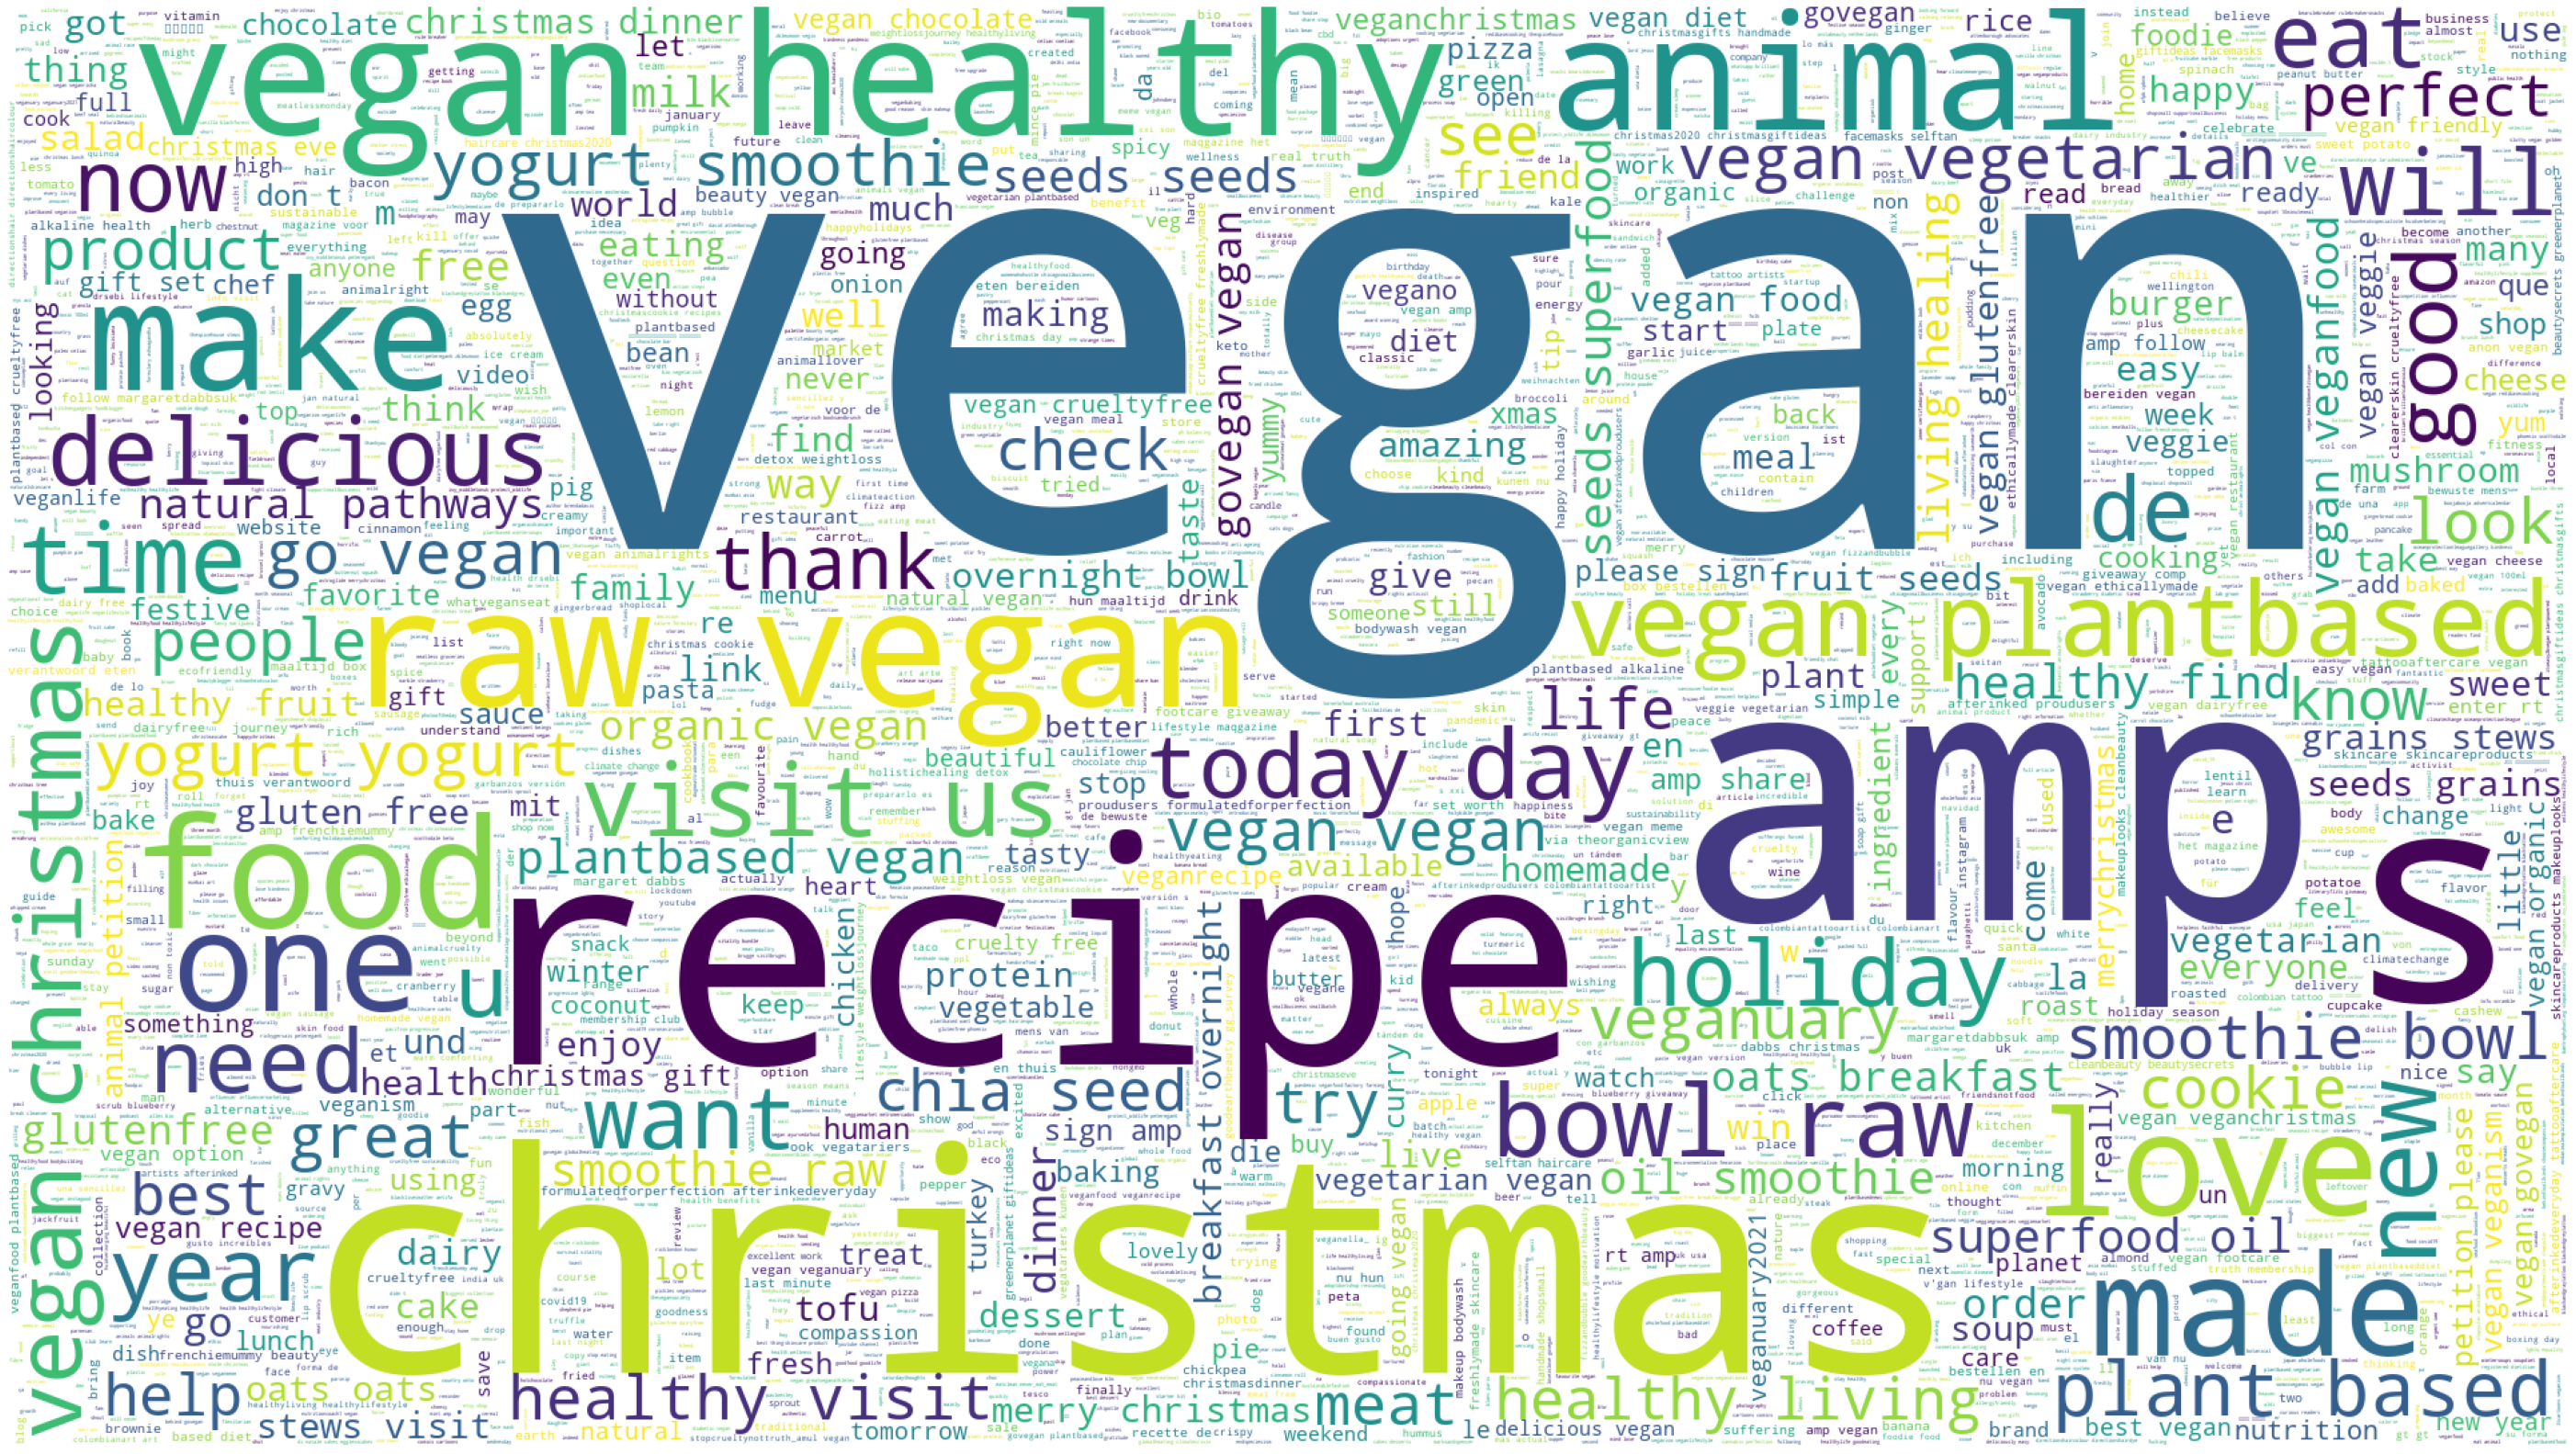

In [12]:
long_string = ','.join(list(fin_data['content_processed'].values))
wordcloud = WordCloud(width= 1920, height = 1080,background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wc=wordcloud.generate(long_string)
plt.figure(figsize=(50,40))
plt.imshow(wc) 
plt.axis("off")

In [24]:
pip install TextBlob

Note: you may need to restart the kernel to use updated packages.


In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    print( sentiment_dict)
    if sentiment_dict['compound'] >= 0.05 :
        sentiment = 'positive'
    elif sentiment_dict['compound'] <= - 0.05 :
        sentiment = 'negative'  
    else :
        sentiment = 'neutral'
    return sentiment    

In [17]:
sen = fin_data['content'].apply(sentiment_scores)

{'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.873}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.842, 'pos': 0.158, 'compound': 0.5423}
{'neg': 0.142, 'neu': 0.46, 'pos': 0.398, 'compound': 0.7717}
{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'compound': 0.8316}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.913, 'pos': 0.087, 'compound': 0.2732}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.102, 'neu': 0.723, 'pos': 0.175, 'compound': 0.6671}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.109, 'neu': 0.721, 'pos': 0.17, 'compound': 0.5423}
{'neg': 0.0, 'neu': 0.813, 'po

In [18]:
fin_data['sentiments'] = sen

In [19]:
fin_data.sentiments.value_counts()

positive    7910
neutral     3868
negative    1222
Name: sentiments, dtype: int64

In [20]:
fin_data

content  \
0      How does the fabulous @edgyveg stay so fit? 💪\...   
1      You Can Make Your Own Vegan Sushi!\n\n&gt;&gt;...   
2      The body heals itself if we create the right c...   
3      #live #life #learn #laugh #love #hate #grow #g...   
4      The beauty of food as medicine is that the cho...   
...                                                  ...   
12995  Breakfast time is coming\nBreakfast time is co...   
12996  Vegan Christmas Recipes The Whole Table Will L...   
12997  If you want to have yourselves a Merry #Vegan ...   
12998  https://t.co/fEHPgptMyj\n\nPlanning for the fi...   
12999  I want to Win A Margaret Dabbs Christmas Gift ...   

                            date  \
0      2020-12-31 23:59:42+00:00   
1      2020-12-27 04:00:17+00:00   
2      2020-12-27 03:59:43+00:00   
3      2020-12-27 03:59:42+00:00   
4      2020-12-27 03:58:30+00:00   
...                          ...   
12995  2020-12-18 08:00:00+00:00   
12996  2020-12-18 07:59:33+00:00   
12997  2020-12-18 07:59:22+00:00   
12998  2020-12-18 07:55:15+00:00   
12999  2020-12-18 07:53:27+00:00   

                                       content_processed sentiments  
0      how does the fabulous @edgyveg stay so fit 💪\n...   positive  
1         you can make your own vegan sushi\n\n&gt;&gt;     neutral  
2      the body heals itself if we create the right c...   positive  
3      #live #life #learn #laugh #love #hate #grow #g...   positive  
4      the beauty of food as medicine is that the cho...   positive  
...                                                  ...        ...  
12995  breakfast time is coming\nbreakfast time is co...    neutral  
12996  vegan christmas recipes the whole table will l...   positive  
12997  if you want to have yourselves a merry #vegan ...   positive  
12998                                                      positive  
12999  i want to win a margaret dabbs christmas gift ...   positive  

[13000 rows x 4 columns]

In [21]:
data_new = fin_data[['sentiments']]

In [27]:
data_new.head(5)

sentiments
0   positive
1    neutral
2   positive
3   positive
4   positive

In [28]:
import plotly.express as px

In [30]:
fig = px.pie(data_new, names='sentiments',title='Sentiments of Vegan Community',color='sentiments',color_discrete_map={'positive':'#65f791',
                                 'negative':'#f76565',
                                 'neutral':'#6765f7'})
fig.show()

In [67]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','amp','rt','de'])
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = data.content_processed.values.tolist()
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chaks\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['fabulous', 'edgyveg', 'stay', 'fit', 'check', 'personal', 'workout', 'routine', 'vegan']


In [68]:
import gensim.corpora as corpora
id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


In [69]:
from pprint import pprint
num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=num_topics)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.071*"vegan" + 0.014*"christmas" + 0.009*"healthy" + 0.008*"seeds" + '
  '0.006*"free" + 0.005*"natural" + 0.005*"make" + 0.004*"find" + 0.004*"raw" '
  '+ 0.004*"oil"'),
 (1,
  '0.036*"vegan" + 0.007*"healthy" + 0.006*"christmas" + 0.006*"seeds" + '
  '0.004*"raw" + 0.004*"love" + 0.004*"oats" + 0.003*"us" + 0.003*"la" + '
  '0.003*"plantbased"'),
 (2,
  '0.045*"vegan" + 0.005*"christmas" + 0.005*"plantbased" + 0.005*"made" + '
  '0.004*"glutenfree" + 0.004*"recipe" + 0.003*"organic" + 0.003*"vegetarian" '
  '+ 0.003*"time" + 0.003*"gift"'),
 (3,
  '0.056*"vegan" + 0.007*"christmas" + 0.007*"healthy" + 0.007*"soap" + '
  '0.006*"plantbased" + 0.005*"vegetarian" + 0.004*"animals" + 0.004*"plant" + '
  '0.003*"organic" + 0.003*"new"'),
 (4,
  '0.059*"vegan" + 0.008*"plantbased" + 0.006*"food" + 0.004*"christmas" + '
  '0.004*"health" + 0.004*"glutenfree" + 0.003*"one" + 0.003*"healthy" + '
  '0.003*"best" + 0.003*"vegetarian"'),
 (5,
  '0.056*"vegan" + 0.009*"yogurt" + 0.006*"h

In [70]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

In [71]:
vis = pyLDAvis.gensim_models.prepare(lda_model,corpus,id2word ,R=10 )

C:\Users\chaks\anaconda3\envs\smm\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [72]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.110913  0.031419       1        1  16.048396
8     -0.006837  0.045439       2        1  15.135310
9     -0.068630  0.091814       3        1  13.575420
6      0.057769 -0.024105       4        1  10.847999
3      0.118218 -0.042734       5        1  10.501456
4      0.112942  0.064644       6        1   8.967242
5      0.027284  0.135574       7        1   6.960985
2      0.035810 -0.130858       8        1   6.959599
1     -0.115853 -0.059549       9        1   5.548443
7     -0.049790 -0.111645      10        1   5.455151, topic_info=            Term        Freq        Total Category  logprob  loglift
1258      yogurt  391.000000   391.000000  Default  10.0000  10.0000
3627       seeds  478.000000   478.000000  Default   9.0000   9.0000
414         soap  204.000000   204.000000  Default   8.0000   8.0000
3822        bowl  361.000000   361.000000  Default   7.0000   7.0000
45          food  680.000000   680.000000  Default   6.0000   6.0000
...          ...         ...          ...      ...      ...      ...
834         like   29.270845   292.834237  Topic10  -5.8200   0.6056
45          food   37.975577   680.999930  Topic10  -5.5597   0.0220
623      healthy   38.524376  1008.700937  Topic10  -5.5453  -0.3565
296    christmas   40.339435  1663.703526  Topic10  -5.4993  -0.8109
24    plantbased   30.964986   929.352481  Topic10  -5.7638  -0.4930

[310 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
20335      6  0.884303  absabhogefit
1339       1  0.119919           acc
1339      10  0.719515           acc
1340       1  0.119845     adoptions
1340      10  0.719069     adoptions
...      ...       ...           ...
2770       7  0.726815            作目
2770       9  0.090852            作目
2771       4  0.181610      通販はこちらから
2771       7  0.726439      通販はこちらから
2771       9  0.090805      通販はこちらから

[1078 rows x 3 columns], R=10, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 9, 10, 7, 4, 5, 6, 3, 2, 8])